In [ ]:
# Austin Diamond

In [ ]:
#Import Libraries
import numpy as np
import re
import pickle
from sklearn.datasets import load_files
from collections import Counter
import matplotlib
import pandas as pd

#nltk imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Import Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')

#Error Handling
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 1. Load the dataset from a CSV file.

In [ ]:
from google.colab import files
files.upload();

Saving Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv to Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [ ]:
reviews = pd.DataFrame(pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"))

# 2. Focus on reviews.text column.

In [ ]:
# create a dataframe just with the review column
focus_reviews = reviews[['reviews.text']]

# 3. Randomly select 1000 reviews.

In [ ]:
# create a dataframe with 1000 random reviews
sample_reviews = focus_reviews.sample(n = 1000)

# 4. Preprocess the text data

In [ ]:
wpt=nltk.WordPunctTokenizer()

In [ ]:
stop_words=nltk.corpus.stopwords.words('english')

In [ ]:
def normalize_docuement (doc):
    #4a. lowercase
    doc=doc.lower()

    #4b. remove special characters\whitespace
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #re.I ignore case sensitive, ASCII-only matching
    doc=doc.strip()

    #4c. tokenize document
    tokens=wpt.tokenize(doc)

    #4d. filter stopwords out of document
    filtered_tokens=[token for token in tokens if token not in stop_words]
    #re-create document from filtered tokens
    doc=' '.join(filtered_tokens)

    return doc


In [ ]:
norm_sample_reviews['reviews.text'] = sample_reviews['reviews.text'].apply(normalize_docuement)

In [ ]:
norm_sample_reviews.columns = ['reviews.text']

In [ ]:
#4e. lemmatize
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer (doc):
  words = doc.split()
  words = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)

lemm_sample_reviews['reviews.text'] = norm_sample_reviews['reviews.text'].apply(lambda x:lemmatizer(x))

# 5. Create a frequency distribution of words (tokens) in the reviews.

In [ ]:
# Convert the column into a single string
reviews_string = ' '.join(lemm_sample_reviews['reviews.text'])

# Create a frequency distribution using Counter
def preprocess (doc):
    # Split into tokens
    tokens = doc.split()
    return tokens

tokens = preprocess(reviews_string)
word_freq = Counter(tokens)

In [ ]:
# Print the most common words
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

great: 318
batteries: 291
tablet: 254
good: 222
use: 221
love: 204
price: 192
buy: 191
work: 173
amazon: 138


# 6. Generate a word cloud to visualize the most common words in the reviews.

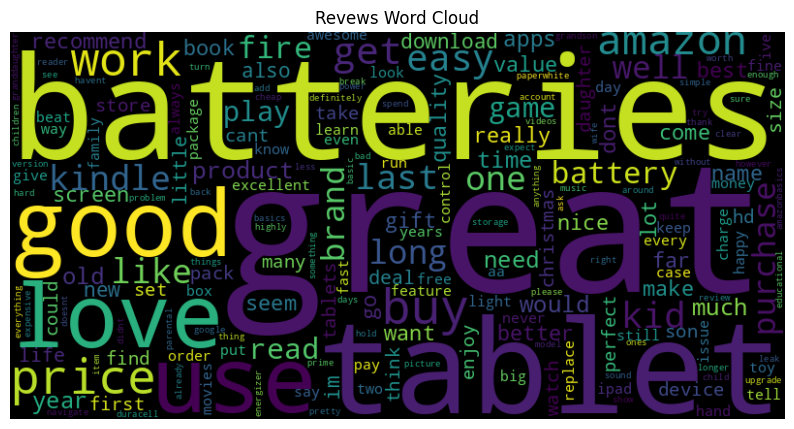

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Revews Word Cloud")
plt.show()


# 7. Calculate the sentiment score for each review using VADER

In [ ]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

sentiment_df = pd.DataFrame()

# Calculate sentiment scores
def get_sentiment_scores(review):
    return analyzer.polarity_scores(review)

# Copy the reviews column to the new df
sentiment_df['reviews'] = norm_sample_reviews['reviews.text']
# Apply the sentiment analysis to the original df and create a new column in the new df for sentiment scores
sentiment_df['sentiment_scores'] = norm_sample_reviews['reviews.text'].apply(get_sentiment_scores)

# Access the compound score from the sentiment_scores column (both in the new df)
sentiment_df['compound_score'] = sentiment_df['sentiment_scores'].apply(lambda x: x['compound'])

# Print the dataframe with sentiment scores
print(sentiment_df)

                                                 reviews  \
25979  best fire tablet reasonable price much faster ...   
16538          kindles easy carry traveling long flights   
22164  tablet light streams well use stream movies mu...   
25798  purchased year old granddaughter purchased old...   
3290                                   surprisingly last   
...                                                  ...   
24915  got grandson christmas wont put comes free kid...   
25872  neat little device love glad added audible fun...   
27338  loving tablet stars opinion definitely worth e...   
27835                            brought gift wife loves   
3707                              work like duracell far   

                                        sentiment_scores  compound_score  
25979  {'neg': 0.19, 'neu': 0.476, 'pos': 0.333, 'com...          0.4215  
16538  {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...          0.4404  
22164  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp.

# 8. Identify and print the top 5 positive and negative reviews based on sentiment scores.

In [ ]:
# Sort the dataframe by the 'compound_score' column
sorted_data = sentiment_df.sort_values('compound_score', ascending=False)

# Get the top 5 positive and negative reviews
top_positive_reviews = sorted_data.head(5)
top_negative_reviews = sorted_data.tail(5)

# Top 5 positive reviews
print("Top 5 Positive Reviews:")
for i, row in top_positive_reviews.iterrows():
    print(f"Review {i}: {row['reviews']} (Compound Score: {row['compound_score']})")

# Top 5 negative reviews
print("\nTop 5 Negative Reviews:")
for i, row in top_negative_reviews.iterrows():
    print(f"Review {i}: {row['reviews']} (Compound Score: {row['compound_score']})")


Top 5 Positive Reviews:
Review 19151: despite able get one amazon late june due apparent strong demand best buy able get one day release april well done best buy owned several previous kindles including recent paperwhite model unprepared small light new oasis model reading one thing actually holding one hand something else entirely oasis batterycharging cover together weigh one ounce latest paperwhite case oasis without cover feels impossibly light ounces sizewise oasis nearly square shape wide tall fact shape different traditional kindle designs compare next paperwhite verify screens actually size first kindle think could easily fit jacket pocket without effort frequent travelers like key reason buy one extremely compact easy pack briefcase purse screen first frontlit kindle ive ever seen simply cannot see trace leds angle dark spots bright spotsjust completely uniform illumination edge edge directions page also appears nearly flush top glass surface helping achieve illusion printed p